In [8]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
original_df = pd.read_csv('../netstats/processed/netstats-threshold-0.5.csv', parse_dates=['date'])
original_df.head()

,date,density,global_cc
0,2020-04-15,0.295238,0.128254
1,2020-04-16,0.285714,0.116825
2,2020-04-17,0.209524,0.098413
3,2020-04-18,0.142857,0.101587
4,2020-04-19,0.123810,0.089524


In [11]:
comparsion_df = original_df.copy()
for threshold in [0.4, 0.6]:
    gittered_df = pd.read_csv(f'../netstats/processed/netstats-threshold-{threshold}.csv', parse_dates=['date'])
    comparsion_df = comparsion_df.merge(gittered_df, how='inner', on='date', suffixes=[None, f'_{threshold}'])
comparsion_df.head()

,date,density,global_cc,density_0.4,global_cc_0.4,density_0.6,global_cc_0.6
0,2020-04-15,0.295238,0.128254,0.400000,0.179683,0.200000,0.095238
1,2020-04-16,0.285714,0.116825,0.380952,0.168254,0.209524,0.097778
2,2020-04-17,0.209524,0.098413,0.314286,0.142857,0.114286,0.067937
3,2020-04-18,0.142857,0.101587,0.238095,0.123175,0.066667,0.051429
4,2020-04-19,0.123810,0.089524,0.209524,0.128889,0.066667,0.051429


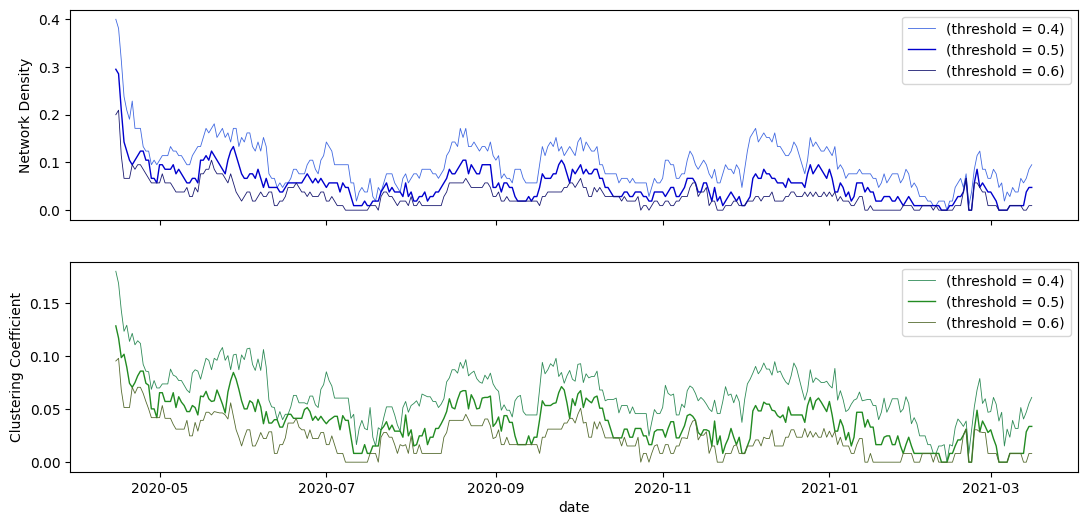

In [13]:
#fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10, 5))
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(13, 6))

#Plot Density
sns.lineplot(x='date', y='density_0.4', data=comparsion_df, ax=ax[0], color="royalblue", linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='density', data=comparsion_df, ax=ax[0], color='mediumblue', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='density_0.6', data=comparsion_df, ax=ax[0], color="midnightblue", linewidth=0.6, label="(threshold = 0.6)")
ax[0].set_ylabel('Network Density')

sns.lineplot(x='date', y='global_cc_0.4', data=comparsion_df, ax=ax[1], color='seagreen', linewidth=0.6, label="(threshold = 0.4)")
sns.lineplot(x='date', y='global_cc', data=comparsion_df, ax=ax[1], color='forestgreen', linewidth=1, label="(threshold = 0.5)")
sns.lineplot(x='date', y='global_cc_0.6', data=comparsion_df, ax=ax[1], color='darkolivegreen', linewidth=0.6, label="(threshold = 0.6)")
ax[1].set_ylabel('Clustering Coefficient')

plt.savefig("../../graphs/Figure_02_2_Netstats-Sensitivity_Analysis.pdf", bbox_inches='tight')
plt.savefig("../../graphs/Figure_02_2_Netstats-Sensitivity_Analysis.png", bbox_inches='tight')
plt.show()